In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


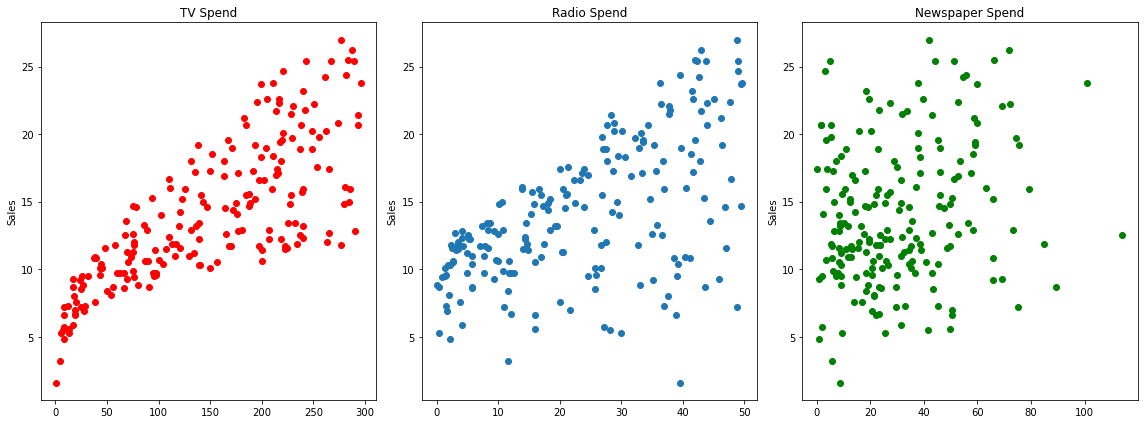

In [5]:
# skrg kita coba liat secara visual hubungan sales nya sama tiap jenis advertisement
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o',color='green')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [6]:
# ada cara lain pake pairplot
# tapi ini juga bakalan nunjukin relationships between features
# yang bakalan berguna kalo nanti buat polynomial regression
# contoh mungkin salesnya bakal lebih kuat kalo TV sama radio barengan

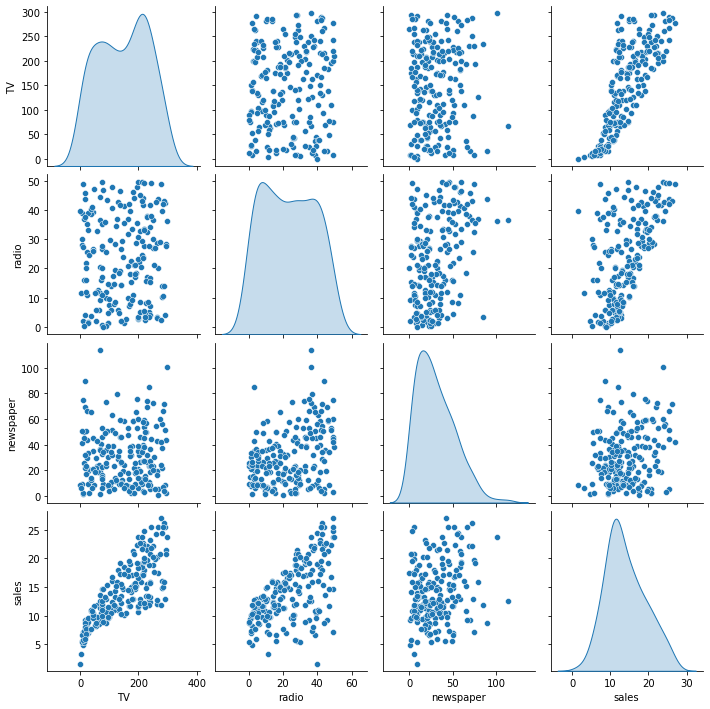

In [7]:
sns.pairplot(df,diag_kind='kde')
plt.show()

## Introducing SciKit Learn

We will work a lot with the scitkit learn library, so get comfortable with its model estimator syntax, as well as exploring its incredibly useful documentation!

---

In [8]:
# skrg kita bagi dataset nya jadi feature dan label
# featurenya kita tinggal drop salesnya

# dan notes!
# kita skrg datasetnya rapih angkanya udah normalized jadi ga pusing
# kalo in real life datasetnya kadang berantakan dan harus di normalized
# ini namanya feature engineering and data preprocessing
# bakalan banyak di next lecture

In [9]:
X = df.drop('sales',axis=1)
y = df['sales']

## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [10]:
# skrg kita pisahin train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [13]:
# urutan nya harus sama persis kayak dibawah, jadi kalo mau gampang copas aja dari docs
# bisa pake help
# ato ga hover ke functionnya
# ato ga pake cmd+K cmd+I

# test_size nya biasa orang pake 30% jadi 0.3 buat convention aja
# detialnya bakalan dibahas lagi next

# random_state itu kayak random seed di numpy
# default nya itu 42 soalnya arbitary choice
# tapi di lecture ini kita bakalan sering pake 101
# harus make sure kalo buat compare kita pake seed yang sama biar akurat


salah satu alesan ada random state itu soalnya kalo baca di docs nya, ada ShuffleSplit(), jadi datasetnya bakalan di shuffle dulu sebelum di split, soalnya kadang ada dataset yg sorted, jadi misal sales nya ascending, jadi kita gamau kalo misal test splitnya itu dapet 30% akhir which is 30% yang terbesar, jadinya di shuffle dulu

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
len(df)

200

In [16]:
# kita bisa liat train set kita 140/200 yaitu 70%
len(X_train)

140

In [17]:
# bener 30%
len(X_test)

60

In [18]:
# kita bisa liat ada index numbernya
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [19]:
# index feature nya sama kaya labelnya, jadi gampang nanti comparenya
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

## Creating a Model (Estimator)

#### Import a model class from a model family

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# setiap kita pake model baru, biasain buka help
# buat liat hyperparameternya yg buat di adjust

# NOTE
# hyperparameter itu sama kayak parameter, cuma sebutan di machine learning aja

help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [22]:
model = LinearRegression()

### Fit/Train the Model on the training data

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [23]:
# gausah model = model.fit
# langsung aja model.fit
model.fit(X_train,y_train)

LinearRegression()

### Metrics

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [24]:
# kita coba liat x test
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [25]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

dari data di atas kita bisa liat no index 37, dengan advertising cost 74.4 di TV, 49.4 di radio, 45.7 di koran, kita bisa dapet sales 14.7

In [26]:
# kita predict test set nya, terus bandingin sama y_test
test_predictions = model.predict(X_test)

In [27]:
# isinya predicted value
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
# kita coba liat dulu mean dari sales nya
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

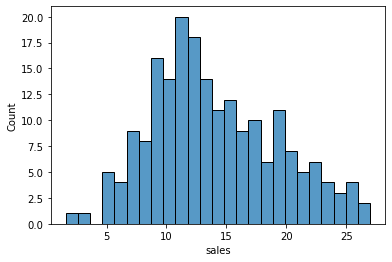

In [30]:
# buat generally liat aja overall sales nya
sns.histplot(data=df,x='sales',bins=25)

In [31]:
# parameter = (y_true,y_pred)
MAE = mean_absolute_error(y_test,test_predictions)

In [32]:
# nilai errornya 1.2, artinya valuenya off sekitar 1.2
# bagus? tergantung konteksnya

# sales.mean nya 14, jadi 1.2 sekitar kurang dari 10%
MAE

1.2137457736144803

In [33]:
# skrg kita pake RMSE buat liat performance kalo ada outliers
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [34]:
# hasil nya masih kuadrat, jadi harus di akar = RMSE
MSE

2.2987166978863773

In [35]:
# MSE = RMSE**2
RMSE

1.5161519375993877

In [36]:
# jadi kesimpulannya

# kita pertama pake MSE buat liat performance overallnya
# terus pake RMSE buat pastiin ada ga data points yang off nya jauh (outliers)

# kalo misal MSE nya performing bagus, tapi RMSE nya jelek, berarti model kita
# performnya bagus secara overall, tapi ada beberapa data points yg way too off

## Residuals

harus nonton video nya kalo mau lebih detail (Residual Plots)

Revisiting Anscombe's Quartet: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

<table class="wikitable">
<tbody><tr>
<th>Property
</th>
<th>Value
</th>
<th>Accuracy
</th></tr>
<tr>
<td><a href="/wiki/Mean" title="Mean">Mean</a> of <i>x</i>
</td>
<td>9
</td>
<td>exact
</td></tr>
<tr>
<td>Sample <a href="/wiki/Variance" title="Variance">variance</a> of <i>x</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>11
</td>
<td>exact
</td></tr>
<tr>
<td>Mean of <i>y</i>
</td>
<td>7.50
</td>
<td>to 2 decimal places
</td></tr>
<tr>
<td>Sample variance of <i>y</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>4.125
</td>
<td>±0.003
</td></tr>
<tr>
<td><a href="/wiki/Correlation" class="mw-redirect" title="Correlation">Correlation</a> between <i>x</i> and <i>y</i>
</td>
<td>0.816
</td>
<td>to 3 decimal places
</td></tr>
<tr>
<td><a href="/wiki/Linear_regression" title="Linear regression">Linear regression</a> line
</td>
<td><i>y</i>&#160;=&#160;3.00&#160;+&#160;0.500<i>x</i>
</td>
<td>to 2 and 3 decimal places, respectively
</td></tr>
<tr>
<td><a href="/wiki/Coefficient_of_determination" title="Coefficient of determination">Coefficient of determination</a> of the linear regression  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle R^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>R</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle R^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ce07e278be3e058a6303de8359f8b4a4288264a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.818ex; height:2.676ex;" alt="R^{2}"/></span>
</td>
<td>0.67
</td>
<td>to 2 decimal places
</td></tr></tbody></table>

In [37]:
quartet = pd.read_csv("anscombes_quartet1.csv")

In [38]:
quartet.head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


In [39]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

In [40]:
quartet.head()

,x,y,pred_y,residual
0,10.0,8.04,8.0,0.04
1,8.0,6.95,7.0,-0.05
2,13.0,7.58,9.5,-1.92
3,9.0,8.81,7.5,1.31
4,11.0,8.33,8.5,-0.17


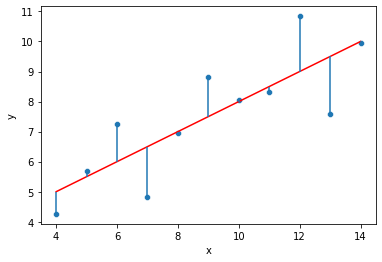

In [41]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
# pake vlines buat mark residualnya
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

In [42]:
help(plt.vlines)

Help on function vlines in module matplotlib.pyplot:

vlines(x, ymin, ymax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
    Plot vertical lines at each *x* from *ymin* to *ymax*.
    
    Parameters
    ----------
    x : float or array-like
        x-indexes where to plot the lines.
    
    ymin, ymax : float or array-like
        Respective beginning and end of each line. If scalars are
        provided, all lines will have same length.
    
    colors : list of colors, default: :rc:`lines.color`
    
    linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional
    
    label : str, default: ''
    
    Returns
    -------
    `~matplotlib.collections.LineCollection`
    
    Other Parameters
    ----------------
    data : indexable object, optional
        If given, the following parameters also accept a string ``s``, which is
        interpreted as ``data[s]`` (unless this raises an exception):
    
        *x*, *ymin*, *ymax*, *colors*
    **kwargs 

<AxesSubplot:xlabel='residual', ylabel='Density'>

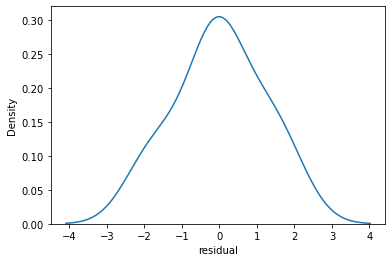

In [43]:
# meannya 0 berarti lumayan bagus, semakin banyak 0 makin bagus kan
# 0 itu berarti ga ada error
sns.kdeplot(quartet['residual'])

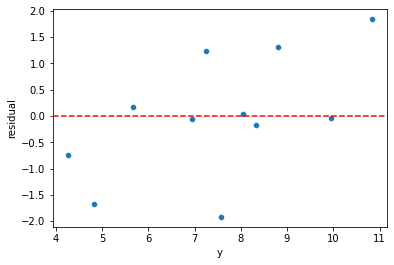

In [44]:
sns.scatterplot(data=quartet,x='y',y='residual')
# ini buat munculin garis lurus
plt.axhline(y=0, color='r', linestyle='--')

pokoknya kalo linear regression itu bentuknya residualnya pasti random begini, ga ada pola, kalo ada pola berarti harus pake model lain

In [45]:
# skrg kita coba quartet 2
# quartet 2-4 itu semua bukan linear regression
quartet = pd.read_csv('anscombes_quartet2.csv')

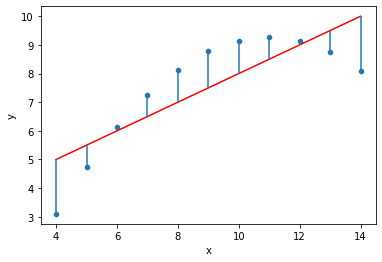

In [46]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

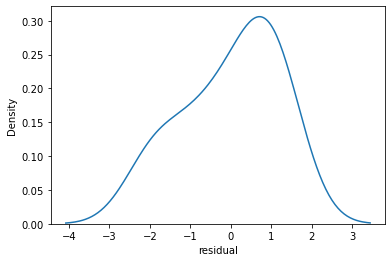

In [47]:
# kalo kita liat kaya gini masih lumayan normal
# meannya masih mendekati 0
sns.kdeplot(quartet['residual'])

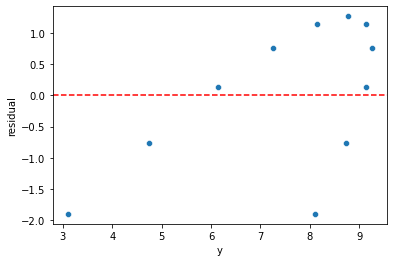

In [48]:
# tapi kalo kita liat plot residualnya udah ga normal
# soalnya ada polanya
# kalo linear regression harus RANDOM
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

### Plotting Residuals

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [49]:
# skrg kita plot residual dari hasil test kita

In [50]:
# Predictions on training and testing sets
test_predictions = model.predict(X_test)

In [51]:
# kalo modelnya perfect, residual nya pasti 0
test_res = y_test - test_predictions

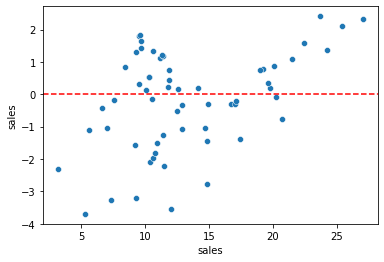

In [53]:
# ini keliatan random jadi bener pake linear regression
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [54]:
len(test_res)

60

In [55]:
test_res.head()

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
Name: sales, dtype: float64

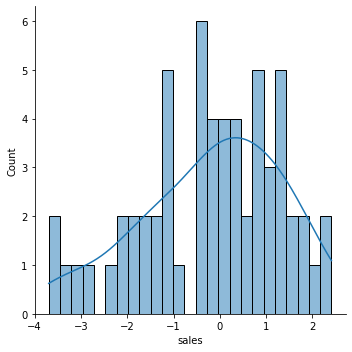

In [57]:
# buat liat kalo kita off seberapa jauh
# kurang lebih masih mendekati 0 masih oke cuma agak jauh -4 aja
# tapi gpp
sns.displot(test_res,bins=25,kde=True)

Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [59]:
# ini cara lain kalo mau, normal probability plot
# normality

In [61]:
import scipy as sp

jadi ini intinya kita bisa liat, semakin jauh data points nya dari garisnya, berarti semakin jomplang

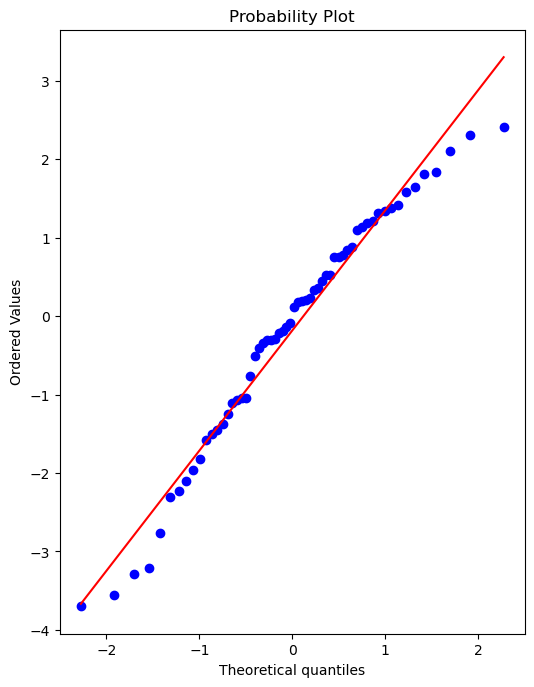

In [62]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

-----------

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [65]:
# kita retrain modelnya pake full data
# jadi ga dibagi test train lagi

In [66]:
final_model = LinearRegression()

In [70]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [71]:
y_hat = final_model.predict(X)

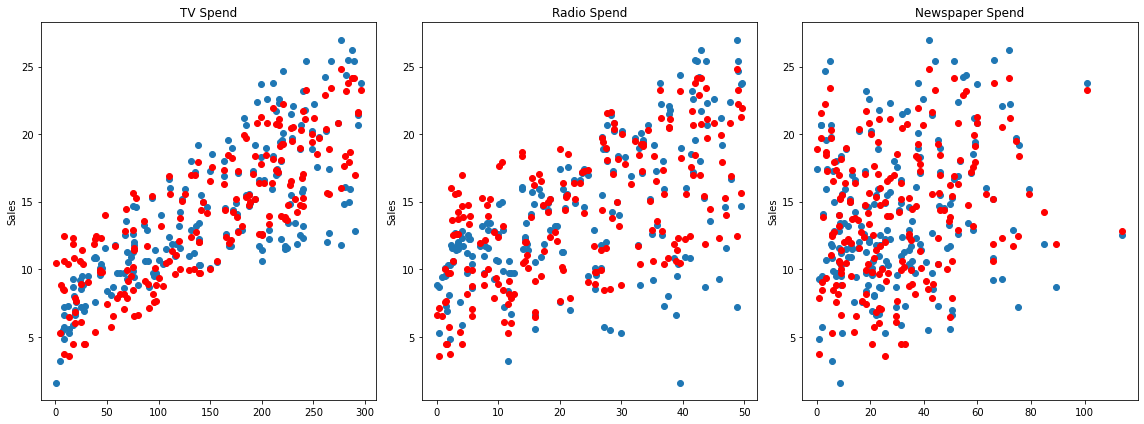

In [76]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [77]:
# residuals
residuals = y_hat - y

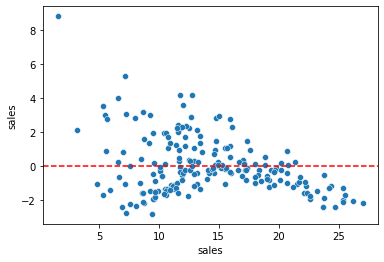

In [78]:
# distributed random
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

In [79]:
# buat liat coef pake .coef_
# URUTAN COEF SAMA KAYA DI DATAFRAMENYA
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [80]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


### Penjelasan cara baca coefficients

Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----
----

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---

**Note! In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case it would make more sense to *normalize* the data, in order to clearly compare features and results. We will cover normalization later on.**

intinya contoh TV 0.045 sekian, kita anggap features yg lain ga bergerak (fixed), kalo spending ke TV ditambah 1 unit, berarti salesnya bertambah 0.045 sekian unit. sama radio berarti salesnya nambah 0.188 sekian unit. tapi kalo newspaper itu minus, berarti berkurang salesnya, jadi bisa di simpulkan gausah advertise di newspaper. dan inget ini kebetulan datasetnya unitnya sama, kalo beda harus di normalized dulu

In [81]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [85]:
# kita coba predicts data baru
# kita buat imaginary dataset


In [86]:
# kita liat dulu features nya
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [88]:
X.shape

(200, 3)

In [89]:
# featuresnya itu 2 dimensi, berarti kita buatnya juga harus sama

In [98]:
# 2 dimensional
campaign = [[149,22,12]]

In [99]:
# skrg misal boss kita nanya
# kalo kita spend 149 TV, 22 radio, 12 newspaper
# coba predict salesnya

In [100]:
final_model.predict(campaign)

/Users/clcx/miniforge3/envs/tf-arm64/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [ ]:
# sekitar 13.89 unit

**How accurate is this prediction? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

-----

## Model Persistence (Saving and Loading a Model)

In [101]:
# save and load model
# dump itu save, load itu load

In [102]:
from joblib import dump, load

In [103]:
# save
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

In [104]:
# skrg misal kita kirim ke co-worker kita
# terus ini co-worker kita mau load

In [105]:
loaded_model = load('sales_model.joblib')

In [106]:
loaded_model

LinearRegression()

In [107]:
# terus habis dia load, contoh dia mau predict yang campaign tadi
loaded_model.predict(campaign)

/Users/clcx/miniforge3/envs/tf-arm64/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [ ]:
# hasilnya sama